# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict credit quality for a number of student loans.

In [13]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [14]:
# Read in data
data = Path("../Resources/student_loans.csv")
df = pd.read_csv(data)
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["credit_ranking"].values

In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [17]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

c:\Users\pablo\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.8009 - mse: 26.8008 - val_loss: 24.9794 - val_mse: 24.9794
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.7025 - mse: 23.7025 - val_loss: 22.3002 - val_mse: 22.3002
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 20.6557 - mse: 20.6559 - val_loss: 19.7404 - val_mse: 19.7404
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 17.7608 - mse: 17.7608 - val_loss: 17.2837 - val_mse: 17.2837
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 15.2899 - mse: 15.2900 - val_loss: 15.0109 - val_mse: 15.0109
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 12.8046 - mse: 12.8045 - val_loss: 12.8861 - val_mse: 12.8861
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 11.0929 - mse: 11.0929 - val_loss: 10.9153 - val_mse: 10.9153
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 8.8596 - mse: 8.8596 - val_loss: 9.1368 - val_mse: 9.1368
Epoch 9/200
35/35 ━━━━━━

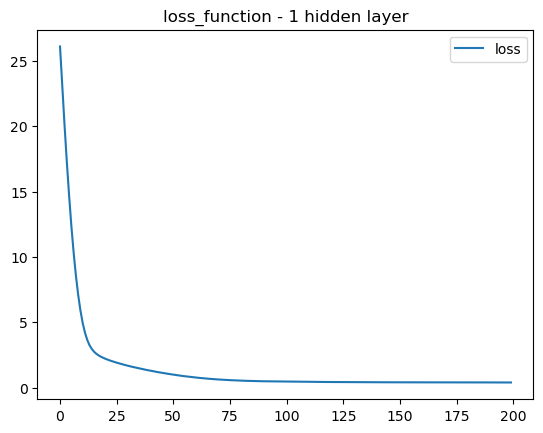

In [19]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

## Define a model with 2 hidden layers

In [20]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [21]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5584 - mse: 34.5583 - val_loss: 30.7256 - val_mse: 30.7256
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 30.9118 - mse: 30.9119 - val_loss: 28.0574 - val_mse: 28.0574
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.5273 - mse: 29.5274 - val_loss: 25.1279 - val_mse: 25.1279
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 26.3655 - mse: 26.3656 - val_loss: 21.7004 - val_mse: 21.7004
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 23.1105 - mse: 23.1107 - val_loss: 17.7972 - val_mse: 17.7972
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 19.5120 - mse: 19.5121 - val_loss: 13.6890 - val_mse: 13.6890
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.0129 - mse: 15.0130 - val_loss: 9.9994 - val_mse: 9.9994
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 11.3372 - mse: 11.3373 - val_loss: 6.9285 - val_mse: 6.9285
Epoch 9/200
35/35 ━━━━━━━━

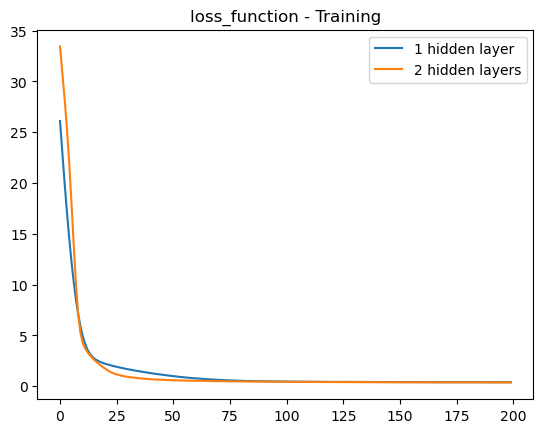

In [22]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

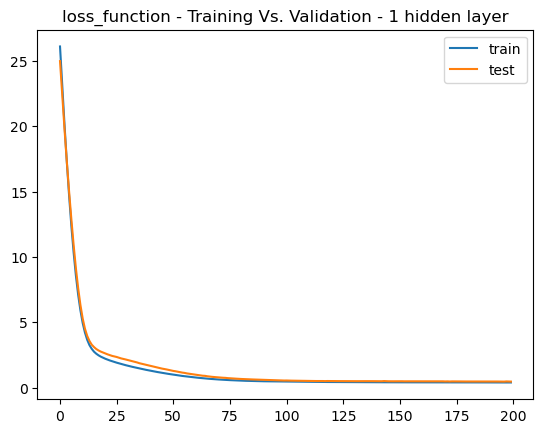

In [23]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

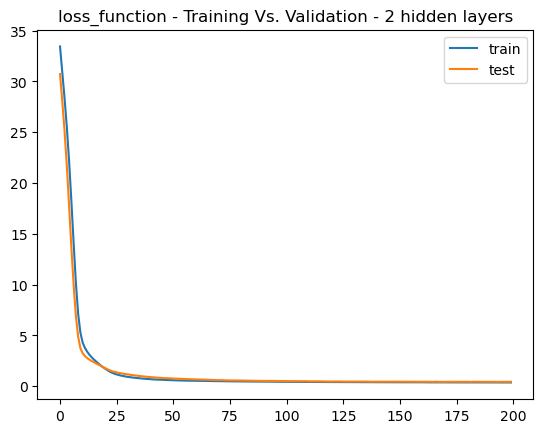

In [24]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()